In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bank-marketing-dataset' dataset.
Path to dataset files: /kaggle/input/bank-marketing-dataset


In [8]:
df = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')
print(df)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [11]:
df = df.drop(["contact", "day", "month"], axis=1)
df = df[df["job"] != "unknown"]
df = df[df["marital"] != "unknown"]
df = df[df["education"] != "unknown"]


In [13]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["deposit"] = LE.fit_transform(df["deposit"])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("deposit", axis = 1),
    df["deposit"],
    test_size = 0.2
    )

In [17]:
X_train = pd.get_dummies(X_train, drop_first=True)#converts categorical (text) columns into numerical columns
X_test = pd.get_dummies(X_test, drop_first=True)

Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5199468085106383, 0.9285714285714286, 'x[2] <= 365.5\ngini = 0.498\nsamples = 8507\nvalue = [4506, 4001]'),
 Text(0.27393617021276595, 0.7857142857142857, 'x[24] <= 0.5\ngini = 0.426\nsamples = 5499\nvalue = [3807, 1692]'),
 Text(0.39694148936170215, 0.8571428571428572, 'True  '),
 Text(0.15691489361702127, 0.6428571428571429, 'x[21] <= 0.5\ngini = 0.368\nsamples = 4951\nvalue = [3746, 1205]'),
 Text(0.0851063829787234, 0.5, 'x[2] <= 124.5\ngini = 0.465\nsamples = 2507\nvalue = [1584, 923]'),
 Text(0.0425531914893617, 0.35714285714285715, 'x[2] <= 77.5\ngini = 0.225\nsamples = 803\nvalue = [699.0, 104.0]'),
 Text(0.02127659574468085, 0.21428571428571427, 'x[0] <= 23.5\ngini = 0.051\nsamples = 342\nvalue = [333, 9]'),
 Text(0.010638297872340425, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.031914893617021274, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.06382978723404255, 0.21428571428571427, 'x[0] <= 28.5\ngini = 0.327\nsamples = 461\nvalue = [366, 95]'),
 Text(0.0531914893

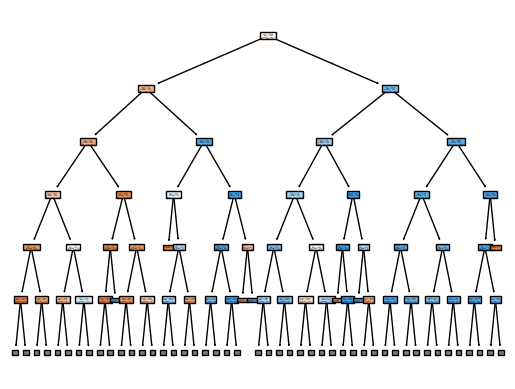

In [18]:
from sklearn.tree import plot_tree
plot_tree(Dt, filled = True, max_depth=5)